In [172]:
import sys
import functools

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [173]:
filename = "flickr30k-freq-train--100bb.csv"

df = pd.read_csv(filename)

In [174]:
df.head()

,class,pred,gt
0,__background__,211251,58014
1,goal,1,44
2,bathroom,3,24
3,macaroni,2,0
4,umpire,2,36


In [175]:
df.shape

(1082, 3)

# Functions

In [176]:
plt.rcParams['figure.figsize'] = [8, 5]
plt.rcParams['figure.dpi'] = 100


def bar_plot(labels, values, label="Values", title="Chart"):
    width = 0.35       # the width of the bars

    fig, ax = plt.subplots()

    ax.bar(labels, values, width, label=label)

    ax.set_ylabel("Frequency")
    ax.set_title(title)
    ax.legend()

def pie_plot(labels, values, title="Chart"):
    fig, ax = plt.subplots()

    ax.pie(values, labels=labels, autopct='%1.1f%%')
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    ax.set_title(title)


def stacked_plot(labels, preds, gts, title="Chart"):
    width = 0.35       # the width of the bars: can also be len(x) sequence

    fig, ax = plt.subplots()

    ax.bar(labels, preds, width, label="# of predicted examples")
    ax.bar(labels, gts, width, bottom=preds, label="# of ground truth examples")

    ax.set_ylabel("Frequency")
    ax.set_title(title)
    ax.legend()

In [177]:
def take(df, start, end):
    return df[start:end]

take10 = functools.partial(take, start=0, end=10)
take15 = functools.partial(take, start=0, end=15)
take20 = functools.partial(take, start=0, end=20)
takenext20 = functools.partial(take, start=10, end=20)

# Preprocessing

In [178]:
# mi dice quanto sbaglio rispetto alla ground truth
df["diff"] = (df["pred"] - df["gt"]).abs()

# mi dice in percentuale (attualmente tra 0-1) quanto sbaglio rispetto alla ground truth
# se è 0 = non c'è errore
# se è 1 = errore max
df["diff_percent"] = (df["pred"] - df["gt"]).abs() / (df["pred"] + df["gt"])

# mi dice quanto sbaglio rispetto alla ground truth tenendo conto del perché 
# (troppe prediction oppure troppo poche)
df["diff_rel"] = df["pred"] - df["gt"]

# numero totale di predizioni per una classe
df["total"] = df["pred"] + df["gt"]

In [179]:
df.head()

,class,pred,gt,diff,diff_percent,diff_rel,total
0,__background__,211251,58014,153237,0.569094,153237,269265
1,goal,1,44,43,0.955556,-43,45
2,bathroom,3,24,21,0.777778,-21,27
3,macaroni,2,0,2,1.000000,2,2
4,umpire,2,36,34,0.894737,-34,38


In [180]:
print("diff totali =", df.sort_values(by="diff", ascending=False)["diff"].sum())
print("diff top-10 =", df.sort_values(by="diff", ascending=False)["diff"][:10].sum())
print("diff __background__ =", df.sort_values(by="diff", ascending=False)["diff"][0].sum())

print("# pred =", df["pred"].sum())
print("# gt =", df["pred"].sum())
print("match (%) =", (df["pred"].sum() - df["diff"].sum()) / df["gt"].sum())

diff totali = 399646
diff top-10 = 287296
diff __background__ = 153237
# pred = 427226
# gt = 427226
match (%) = 0.06455599612383141


# Analysis

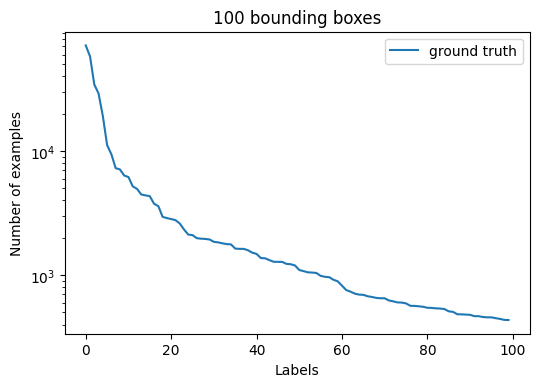

In [181]:
dfx = df.copy()
dfx = dfx.sort_values(by="gt", ascending=False)

labels = list(range(dfx["class"].shape[0]))
preds = dfx.sort_values(by="pred", ascending=False)["pred"]
gts = dfx.sort_values(by="gt", ascending=False)["gt"]
values = [preds, gts]

fig = plt.figure(figsize=(6, 4))
ax1 = fig.subplots(1, 1)

#ax1.plot(labels[:100], preds[:100], label="pred")
ax1.plot(labels[:100], gts[:100], label="ground truth")
ax1.set_title("100 bounding boxes")
ax1.set_xlabel("Labels")
ax1.set_ylabel("Number of examples")
ax1.set_yscale("log")
ax1.legend()

plt.show()

# fig, ax = plt.subplots()
# ax.stackplot(labels, values, labels=["pred", "gt"])
# ax.set_yscale("log")
# ax2.legend()
# # ax.set_title('World population')
# # ax.set_xlabel('Year')
# # ax.set_ylabel('Number of people (millions)')

# plt.show()

## Top-10 most predicted classes on ground truth boxes

In [182]:
dfx = df.copy()
dfx.sort_values(by="pred", ascending=False).head(10)[["class", "pred"]]

,class,pred
0,__background__,211251
36,man,18539
37,shirt,16634
69,woman,12866
94,hair,11659
153,head,7309
188,hat,5132
431,people,4826
181,boy,4485
297,hand,4353


## Top-10 most predicted classes on ground truth boxes

In [183]:
dfx = df.copy()
dfx.sort_values(by="gt", ascending=False).head(10)[["class", "gt"]]

,class,gt
36,man,71120
0,__background__,58014
69,woman,34421
431,people,29121
37,shirt,19129
181,boy,11182
92,dog,9427
109,girl,7292
146,water,7118
201,wall,6358


## Frequency of classes sorted by absolute gap between prediction and ground truth

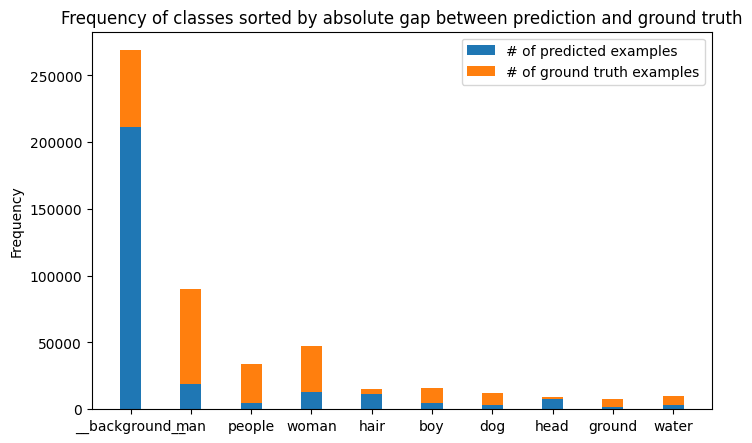

,class,pred,gt,diff,diff_rel,diff_percent
0,__background__,211251,58014,153237,153237,0.569094
36,man,18539,71120,52581,-52581,0.586455
431,people,4826,29121,24295,-24295,0.715674
69,woman,12866,34421,21555,-21555,0.455834
94,hair,11659,3600,8059,8059,0.528147
181,boy,4485,11182,6697,-6697,0.427459
92,dog,2731,9427,6696,-6696,0.550748
153,head,7309,1856,5453,5453,0.594981
370,ground,1712,6177,4465,-4465,0.565978
146,water,2860,7118,4258,-4258,0.426739


In [184]:
dfx = df.copy()
dfx = dfx.sort_values(by=["diff"], ascending=False)

labels = take10(dfx["class"])
preds = take10(dfx["pred"])
gts = take10(dfx["gt"])

stacked_plot(labels, preds, gts, title="Frequency of classes sorted by absolute gap between prediction and ground truth")
plt.show()

dfx.head(n=10)[["class", "pred", "gt", "diff", "diff_rel", "diff_percent"]]

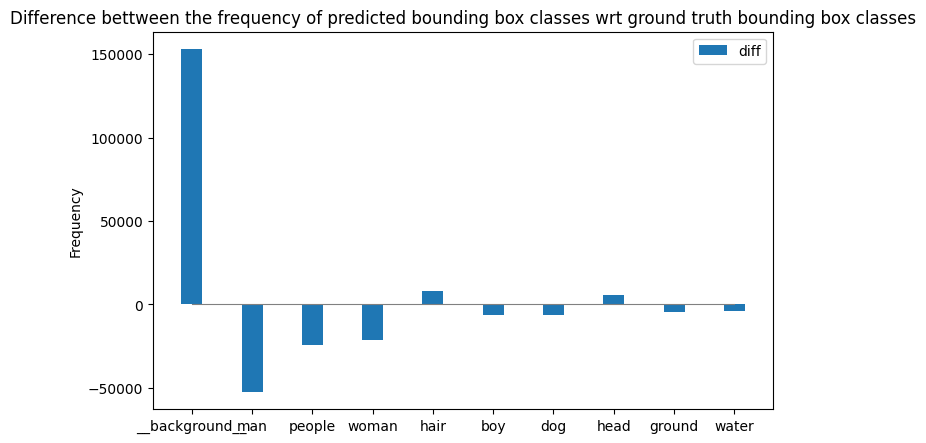

In [185]:
dfx = df.copy()
dfx = dfx.sort_values(by=["diff"], ascending=False)

labels = take10(dfx["class"])
diff_rel = take10(dfx["diff_rel"])

bar_plot(labels, diff_rel, label="diff", title="Difference bettween the frequency of predicted bounding box classes wrt ground truth bounding box classes")
plt.plot([0] * 10, "grey", linewidth=0.8)
plt.show()

## Frequency of classes sorted total number of prediction

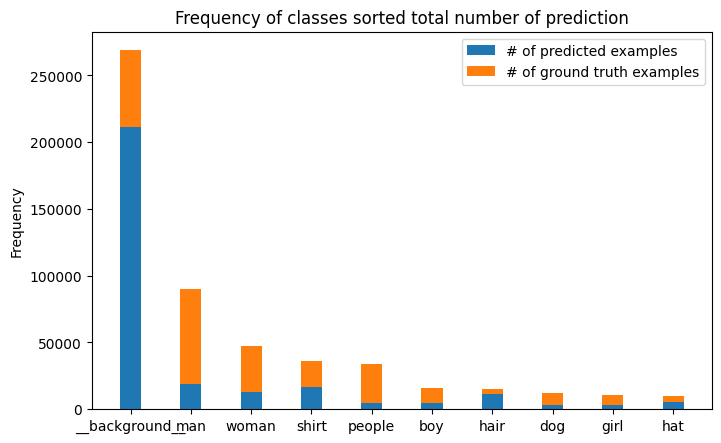

In [186]:
dfx = df.copy()
dfx = dfx.sort_values(by=["total"], ascending=False)

labels = take10(dfx["class"])
preds = take10(dfx["pred"])
gts = take10(dfx["gt"])

stacked_plot(labels, preds, gts, title="Frequency of classes sorted total number of prediction")
plt.show()

## Frequency of classes sorted by diff

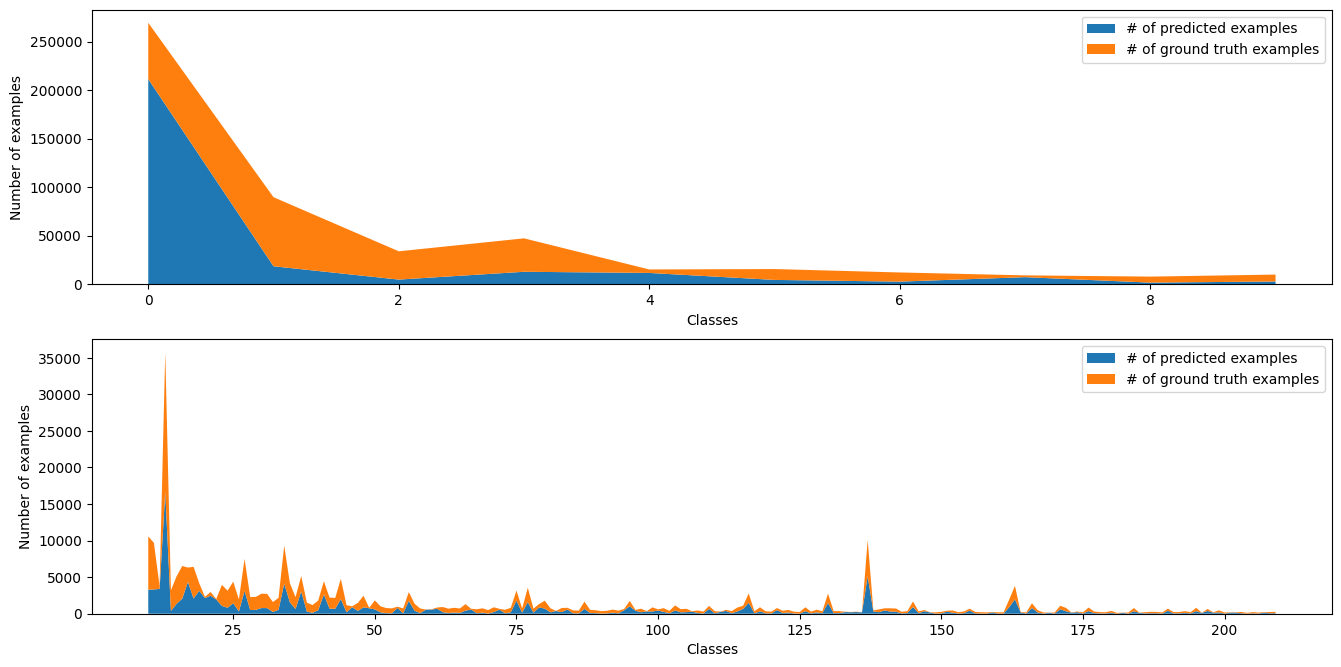

In [187]:
dfx = df.copy()
dfx = dfx.sort_values(by=["diff"], ascending=False)

def get_labels(i, n): return np.array(list(range(n))) + i
def get_preds(i, n): return take(dfx["pred"], start=i, end=i + n)
def get_gts(i, n): return take(dfx["gt"], start=i, end=i + n)
def get_values(i, n): return np.array([get_preds(i, n), get_gts(i, n)])

fig = plt.figure(figsize=(16, 8))

ax1, ax2 = fig.subplots(2, 1)

i, n = 0, 10
ax1.stackplot(get_labels(i, n), get_values(i, n),
             labels=["# of predicted examples", "# of ground truth examples"],)

ax1.legend()
# ax1.set_title("Frequency of classes sorted total number of prediction")
ax1.set_xlabel("Classes")
ax1.set_ylabel("Number of examples")

i, n = 10, 200
ax2.stackplot(get_labels(i, n), get_values(i, n),
             labels=["# of predicted examples", "# of ground truth examples"],)

ax2.legend()
# ax2.set_title("Frequency of classes sorted total number of prediction")
ax2.set_xlabel("Classes")
ax2.set_ylabel("Number of examples")

# i, n = 110, 400
# ax3.stackplot(get_labels(i, n), get_values(i, n),
#              labels=["# of predicted examples", "# of ground truth examples"],)

# ax3.legend()
# # ax3.set_title("Frequency of classes sorted total number of prediction")
# ax3.set_xlabel("Classes")
# ax3.set_ylabel("Number of examples")

plt.show()

## Like the above but with bars

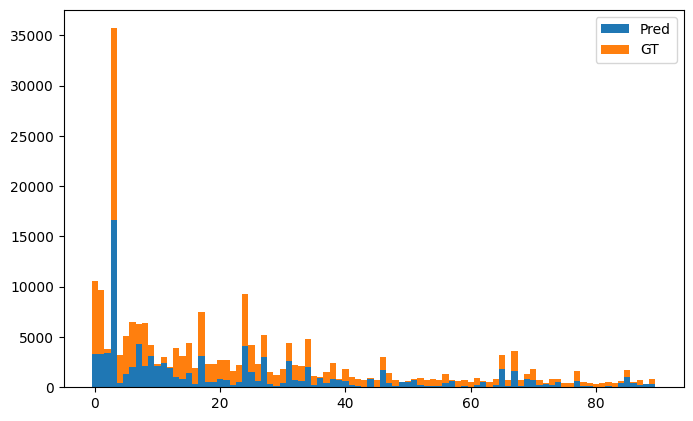

In [188]:
dfx = df.copy()

dfx = dfx.sort_values(by=["diff"], ascending=False)
dfx = take(dfx, start=10, end=100)

#labels = [""] * df["class"].shape[0]
labels = np.array(range(dfx["class"].shape[0]))
preds = dfx["pred"]
gts = dfx["gt"]

# vals = [preds, gts]

fig, ax = plt.subplots()
# ax.stackplot(labels, vals, labels=["Pred", "GT"])
ax.bar(labels, preds, label="Pred", width=1.0)
ax.bar(labels, gts, label="GT", width=1.0, bottom=preds)
ax.legend()

# stacked_plot(labels, preds, gts, title="Frequency of classes sorted total number of prediction")
plt.show()

## Difference between frequency of predicted and ground truth classes (i.e., absolute error)

## 

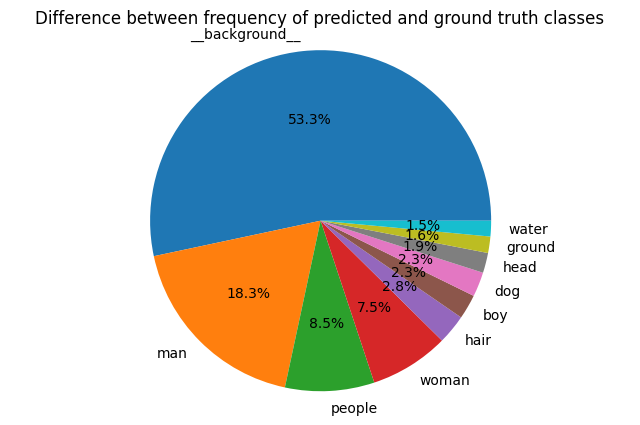

In [189]:
df = df.sort_values(by=["diff"], ascending=False)

labels = take10(df["class"])
diffs = take10(df["diff"])

pie_plot(labels, diffs, title="Difference between frequency of predicted and ground truth classes")
plt.show()

## Diff % wrt ground truth

In [190]:
dfx = df.copy()
dfx = dfx[(dfx["pred"] > 1000) & (dfx["gt"] > 1000)]

dfx.sort_values(by="diff_percent", ascending=False).head(n=10)

,class,pred,gt,diff,diff_percent,diff_rel,total
431,people,4826,29121,24295,0.715674,-24295,33947
153,head,7309,1856,5453,0.594981,5453,9165
36,man,18539,71120,52581,0.586455,-52581,89659
0,__background__,211251,58014,153237,0.569094,153237,269265
370,ground,1712,6177,4465,0.565978,-4465,7889
92,dog,2731,9427,6696,0.550748,-6696,12158
94,hair,11659,3600,8059,0.528147,8059,15259
361,window,3131,1042,2089,0.500599,2089,4173
83,table,1353,3759,2406,0.470657,-2406,5112
243,street,1069,2885,1816,0.459282,-1816,3954


## Esotheric classes

In [191]:
#(df["gt"] < 10) | 
df[(df["pred"] > 50) & (df["gt"] < 10)].sort_values(by="diff", ascending=False).head(n=20)

,class,pred,gt,diff,diff_percent,diff_rel,total
455,headlight,136,7,129,0.902098,129,143
918,leaf,110,7,103,0.880342,103,117
922,patch,64,7,57,0.802817,57,71
435,speaker,58,9,49,0.731343,49,67


In [192]:
df[((df["gt"] >= 10) & (df["gt"] < 100)) | ((df["pred"] >= 10) & (df["pred"] < 100))].sort_values(by="diff", ascending=False).head(n=20)

,class,pred,gt,diff,diff_percent,diff_rel,total
217,ear,1950,69,1881,0.931649,1881,2019
137,tire,747,67,680,0.835381,680,814
583,girls,81,697,616,0.791774,-616,778
210,room,60,676,616,0.836957,-616,736
265,dogs,56,667,611,0.845090,-611,723
106,couch,91,625,534,0.745810,-534,716
372,eye,549,25,524,0.912892,524,574
264,watch,564,51,513,0.834146,513,615
21,bed,99,592,493,0.713459,-493,691
486,kids,71,540,469,0.767594,-469,611


In [193]:
df[((df["gt"] >= 100) & (df["gt"] < 1000)) | ((df["pred"] >= 100) & (df["pred"] < 1000))].sort_values(by="diff", ascending=False).head(n=20)

,class,pred,gt,diff,diff_percent,diff_rel,total
196,shoe,3391,395,2996,0.791337,2996,3786
531,men,385,2833,2448,0.760721,-2448,3218
231,wheel,2140,173,1967,0.850411,1967,2313
259,face,2462,511,1951,0.656239,1951,2973
159,floor,816,2337,1521,0.482398,-1521,3153
47,beach,310,1638,1328,0.681725,-1328,1948
122,boat,507,1771,1264,0.554873,-1264,2278
79,field,525,1779,1254,0.544271,-1254,2304
140,snow,776,1969,1193,0.434608,-1193,2745
212,bench,767,1939,1172,0.433112,-1172,2706


In [194]:
df[(df["gt"] >= 1000) | (df["pred"] >= 1000)].sort_values(by="diff", ascending=False).head(n=20)

,class,pred,gt,diff,diff_percent,diff_rel,total
0,__background__,211251,58014,153237,0.569094,153237,269265
36,man,18539,71120,52581,0.586455,-52581,89659
431,people,4826,29121,24295,0.715674,-24295,33947
69,woman,12866,34421,21555,0.455834,-21555,47287
94,hair,11659,3600,8059,0.528147,8059,15259
181,boy,4485,11182,6697,0.427459,-6697,15667
92,dog,2731,9427,6696,0.550748,-6696,12158
153,head,7309,1856,5453,0.594981,5453,9165
370,ground,1712,6177,4465,0.565978,-4465,7889
146,water,2860,7118,4258,0.426739,-4258,9978


## Pred vs GT

We have 1 outliers in x and 6 outliers in y
Disregarded 6 outliers


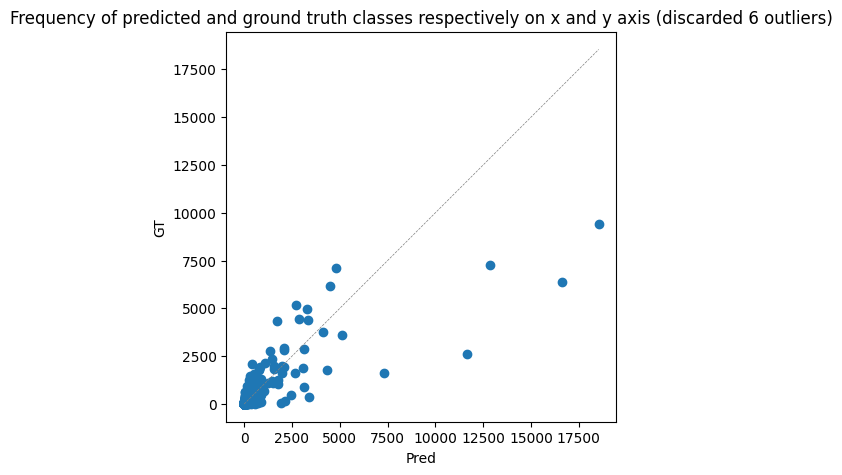

In [195]:
def scatter_plot(x, y):
    # definitions for the axes
    left, width = 0.1, 0.65
    bottom, height = 0.1, 0.65

    rect_scatter = [left, bottom, width, height]

    # start with a square Figure
    fig = plt.figure(figsize=(6, 6))

    # scatter plot
    ax = fig.add_axes(rect_scatter)
    ax.scatter(x, y)

    # labels
    ax.set_xlabel("Pred")
    ax.set_ylabel("GT")


def reject_outliers(data, m=2):
    return data[abs(data - np.mean(data)) < m * np.std(data)]


dfx = df.copy()
dfx = dfx.sort_values(by="gt", ascending=False)

m = 3.3

x = dfx["pred"].to_numpy()
y = dfx["gt"].to_numpy()

s1 = x.shape[0]

x = reject_outliers(x, m=m)
y = reject_outliers(y, m=m)

sx = x.shape[0]
sy = y.shape[0]
s2 = min(sx, sy)

# clip to same size
x = x[:s2]
y = y[:s2]
good = list(range(max(np.max(np.abs(x)), np.max(np.abs(y)))))

n_outliers = s1 - s2

print(f"We have {s1 - sx} outliers in x and {s1 - sy} outliers in y")
print(f"Disregarded {n_outliers} outliers")


scatter_plot(x, y)
plt.plot(good, good, color="gray", linewidth=0.5, linestyle="--")
plt.title(f"Frequency of predicted and ground truth classes respectively on x and y axis (discarded {n_outliers} outliers)")
plt.show()

We have 31 outliers in x and 54 outliers in y
Disregarded 54 outliers


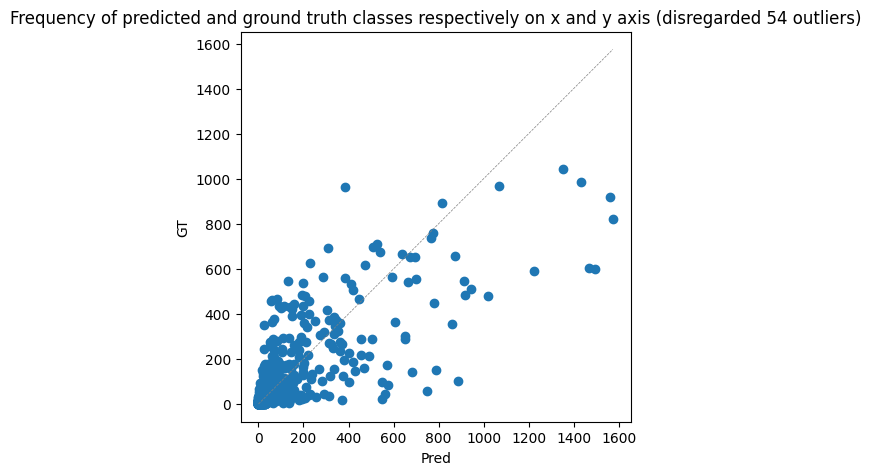

In [196]:
dfx = df.copy()
dfx = dfx.sort_values(by="gt", ascending=False)

m = 0.2

x = dfx["pred"].to_numpy()
y = dfx["gt"].to_numpy()

s1 = x.shape[0]  # size of arrays before outliers are removed

x = reject_outliers(x, m=m)
y = reject_outliers(y, m=m)

sx = x.shape[0]
sy = y.shape[0]
s2 = min(sx, sy)

# clip to same size
x = x[:s2]
y = y[:s2]
good = list(range(max(np.max(np.abs(x)), np.max(np.abs(y)))))

n_outliers = s1 - s2

print(f"We have {s1 - sx} outliers in x and {s1 - sy} outliers in y")
print(f"Disregarded {n_outliers} outliers")

scatter_plot(x, y)
plt.plot(good, good, color="gray", linewidth=0.5, linestyle="--")
plt.title(f"Frequency of predicted and ground truth classes respectively on x and y axis (disregarded {n_outliers} outliers)")
plt.show()

## How many out-of-vocabulary classes do we have in ground truth?

In [197]:
out_of_vocabulary = ['alarm clock', 'ceiling fan', 'tail fin', 'birthday cake', 'stop sign,stopsign', 'microwave,microwave oven', 'skateboard ramp', 'refrigerator,fridge', 'knee pads', 'tennis court', 'tea pot', 'television,tv', 'garage door', 'sailboat,sail boat', 'racket,racquet', 'rock wall', 'headboard,head board', 'tea kettle', 'tennis racket,tennis racquet', 'train station', 'tennis player', 'toilet brush', 'pepper shaker', 'hair dryer', 'toilet seat', 'skateboard,skate board', 'floor lamp', 'french fries', 'christmas tree', 'living room', 'teddy bear', 'baseball field', 'ski boot', 'shower curtain', 'polar bear', 'hot dog,hotdog', 'surfboard,surf board', 'dirt bike', 'tail wing', 'area rug', 'bow tie', 'fire extinguisher', 'tail feathers', 'beach chair', 'fire hydrant,hydrant', 'weather vane', 'soccer ball', 'head band', 'bath tub', 'coffee table', 'traffic light', 'parking meter', 'wet suit', 'teddy bears', 'suitcase,suit case', 'tank top', 'shin guard', 'wii remote', 'pizza slice', 'home plate', 'ski boots', 'snow suit', 'banana slice', 'stuffed animals', 'train platform', 'tissue box', 'cutting board', 'license plate', 'ski pole', 'clock tower', 'toilet tank', 'palm trees', 'skate park', 'computer monitor', 'flip flop', 'remote control', 'paper towels', 'train tracks', 'donut,doughnut', 'soccer player', 'toilet bowl', 'lounge chair', 'sidewalk,side walk', 'stove top,stovetop', 'tomato slice', 'window sill', 'toilet lid', "pitcher's mound", 'palm tree', 'banana bunch', 'tennis shoe', 'giraffe head', 'baseball player', 'water bottle', 'tennis ball', 'cell phone', 'computer mouse', 'ski pants', 'clock face', 'fire escape', 'police officer', 'trash can', 'front window', 'office chair', 'door knob', 'banana peel', 'baseball game', 'cabinet door', 'traffic cone', 'nightstand,night stand', 'suit jacket', 'train engine', 'wrist band', 'toilet paper', 'street sign', 'computer screen', 'wine glass', 'train car', 'donuts,doughnuts', 'tennis match', 'railroad tracks', 'stuffed bear', 'snow pants', 'neck tie', 'baseball bat', 'safety cone', 'paper towel', 'back wheel', 'soccer field', 'throw pillow', 'oven door', 'lamp shade', 'pine tree', 'lamp post,lamppost', 'station wagon', 'signal light', 'american flag', 'baseball cap', 'front legs', 'life jacket', 'water tank', 'gas station', 'entertainment center', 'stuffed animal', 'display case', 'front wheel', 'coffee pot', 'cowboy hat', 'table cloth', 'fire truck,firetruck', 'game controller', 'sweat band', 'coin slot', 'pillow case', 'coffee cup', 'counter top', 'baseball uniform', 'book shelf', 'facial hair', 'end table', 'shin guards', 'head light', 'tennis net', 'trash bag', 'ski poles', 'parking lot', 'gas tank', 'soap dispenser', 'life vest', 'train front', 'exhaust pipe', 'light fixture', 'power lines', 'roman numerals', 'picnic table', 'wine bottle', 'tree trunk', 'motor bike', 'traffic sign', 'little girl', 'passenger car', 'brake light', 'roman numeral', 'shower head', 'handle bars', 'cardboard box', 'mountain range', 'eye glasses', 'salt shaker', 'knee pad', 'shower door', 'bathing suit', 'manhole cover', 'door handle', 'picture frame', 'hour hand', 'dvd player', 'ski slope', 'french fry', 'landing gear', 'coffee maker', 'light switch', 'tv stand', 'air vent', 'steering wheel', 'baseball glove', 'power pole', 'dirt road', 'telephone pole', 'jet engine', 'tee shirt', 'face mask', 'bathroom sink', 'laptop computer', 'windshield wipers', 'hill side', 'tail light,taillight', 'snow board', 'stop light', 'ball cap', 'traffic signal', 'soda can', 'ski lift', 'tennis shoes', 'swim trunks', 'butter knife', 'train cars', 'pine trees', 'park bench', 'second floor', 'hand towel', 'flip flops', 'back pack', 'ski tracks', 'baseball players', 'stone wall', 'dress shirt', 'ski goggles', 'power line', 'train track', 'air conditioner', 'baseball mitt', 'mouse pad', 'garbage can', 'taxi cab', 'control panel', 'clock hand', 'brick wall', 'grass field', 'utility pole', 'mountain top', 'hot dogs,hotdogs', 'bed frame', 'tail lights', 'traffic lights', 'candle holder', 'guard rail', 'tree branches', 'trash bin', 'side mirror', 'light pole', 'street lamp', 'paper plate', 'fence post', 'door frame', 'tshirt,t-shirt,t shirt', 'wire fence', 'side window', 'table lamp', 'pony tail', 'ocean water', 'flower pot', 'tree line', 'sign post', 'ski suit', 'passenger train', "catcher's mitt", 'electrical outlet', 'bike rack', 'windshield wiper', 'bus stop', 'police car', 'name tag', 'computer keyboard', 'glass door', 'wine glasses', 'young man', 'light post', 'ski jacket', 'streetlight,street light', 'beer bottle', 'wrist watch', 'tile floor', 'tree branch', 'towel rack']
assert len(out_of_vocabulary) == 295

# please note that loaded classes were preprocessed in order to replace commas with slashes for better usage with CSV extension.
# we need to preprocess also this classes

# print(len(list(filter(lambda x: x.find(',') != -1, out_of_vocabulary))))

out_of_vocabulary = [oov.replace(",", "/") for oov in out_of_vocabulary]

In [198]:
dfx = df.copy()

dfx = dfx[dfx["class"].isin(out_of_vocabulary)]
dfx = dfx.sort_values(by=['diff'], ascending=False)

n_gt_oov = dfx["gt"].sum()
n_pred_oov = dfx["pred"].sum()
n_diff_oov = dfx["diff"].sum()
n = df["gt"].sum()

assert n == df["pred"].sum()

print(f"In totale, ci sono {n_gt_oov} bounding box ground truth etichettate con classi out-of-vocabulary")
print(f"In totale, il modello predice {n_pred_oov} bounding box etichettate con classi out-of-vocabulary")
print(f"In totale, la differenza del valore assoluto tra la frequenza delle classi predette e quella delle ground truth è {n_diff_oov} su un totale di {n} query")
print(dfx.head())

In totale, ci sono 7089 bounding box ground truth etichettate con classi out-of-vocabulary
In totale, il modello predice 4078 bounding box etichettate con classi out-of-vocabulary
In totale, la differenza del valore assoluto tra la frequenza delle classi predette e quella delle ground truth è 3697 su un totale di 427226 query
                      class  pred    gt  diff  diff_percent  diff_rel  total
316      sidewalk/side walk  1999  2777   778      0.162898      -778   4776
105    surfboard/surf board   193   823   630      0.620079      -630   1016
66   skateboard/skate board   419   892   473      0.360793      -473   1311
175      suitcase/suit case   105   340   235      0.528090      -235    445
45           racket/racquet    61   288   227      0.650430      -227    349
